One of the basic neural network is simple neural network but there are following limitation due to which we move towards CNN (Convolutional Neural Network). [Why Shift to CNNs: Solving Simple Neural Network Limitations and Understanding CNN [part1]](https://mfahadbashir.hashnode.dev/why-shift-to-cnns-solving-simple-neural-network-limitations-and-understanding-cnn-part1)
# CNN (Convolutional Neural Network)
CNNs are a type of Neural Networks inspired by how our brain processes visual information.This is the basic structure outline

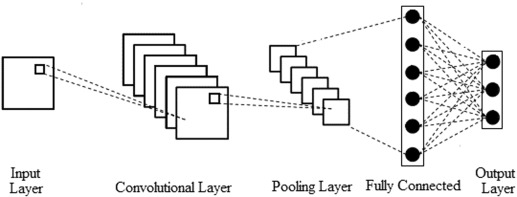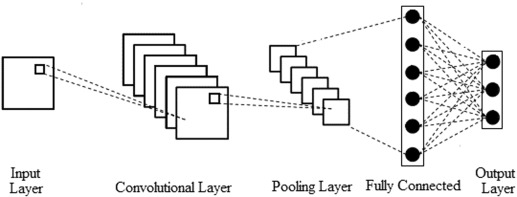

# About Dataset
**Rice Image Dataset**
Five different Rice Image Dataset. Arborio, Basmati, Ipsala, Jasmine, Karacadag
* Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.
*  The dataset (1) has 75K images including 15K pieces from each rice variety. The dataset (2) has 12 morphological, 4 shape and 90 color features.

Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. 
In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. **A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset.** 
Learn more about dataset [Rice Images Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/data)

# Step by Step Implementation

## 1.Importing libraries

In [8]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check TensorFlow version to ensure everything is set up correctly
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


## 2.loading and exploring the dataset

Categories: ['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']


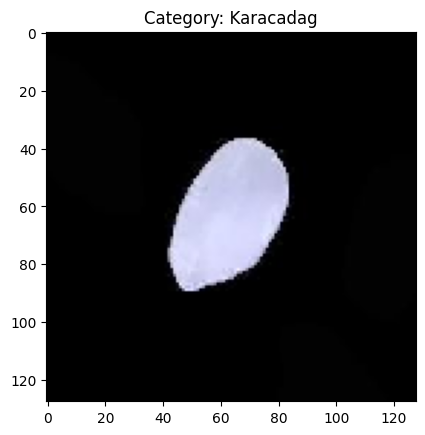

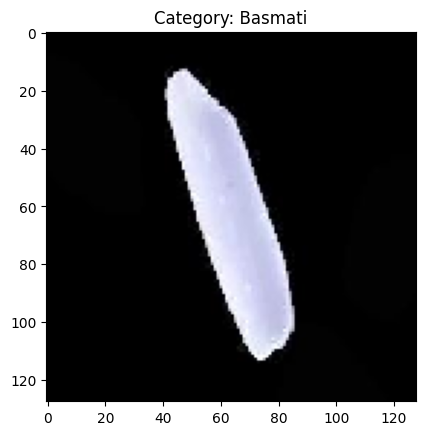

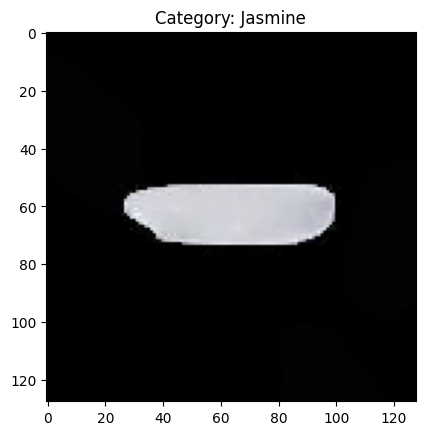

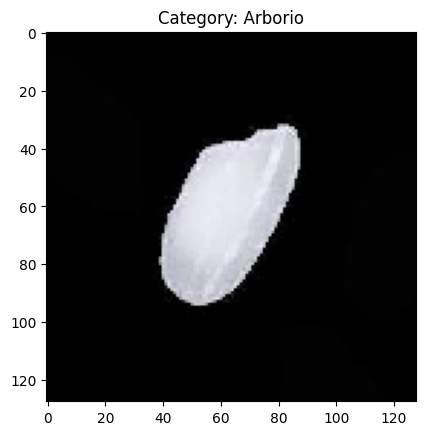

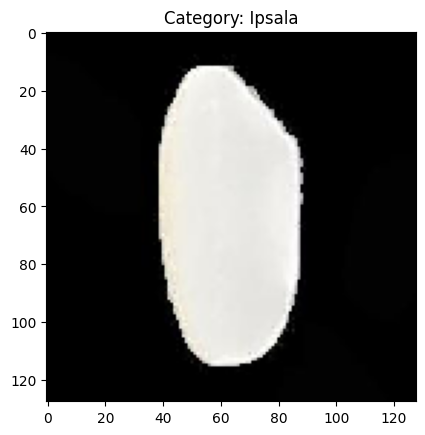

In [6]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"  # Replace with your dataset folder if needed

# Explore the dataset - checking how the data is structured
categories = [category for category in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, category))]
print("Categories:", categories)

# Visualize some sample images from each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    sample_image = os.listdir(category_path)[0]  # Pick one image from each category
    img = image.load_img(os.path.join(category_path, sample_image), target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Category: {category}")
    plt.show()


## 3. Data- Pre Processing (preparing for training)

* **ImageDataGenerator**: It helps generate batches of image data with real-time data augmentation. In our case, we are only normalizing the pixel values and splitting the data.


* **flow_from_directory()**: This method will load images from the directories, automatically labeling them based on the folder names.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)
# Flow from directory for training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',  # Multiclass classification
    subset='training'  # Use this subset for training
)
# Flow from directory for validation images
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use this subset for validation
)



Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## 4. Building the CNN model
we will be building the model 
1. Convolutional layers to detect features.
2. Pooling layers to reduce the dimensions.
3. Flattening layer to convert the 2D feature maps into a 1D vector.
4. Fully connected (Dense) layers for classification.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Initialize the CNN model
model = Sequential()

# Input layer (added explicitly)
model.add(Input(shape=(128, 128, 3)))

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))  # 32 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer with 2x2 pool size

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer with 2x2 pool size

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # 128 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer with 2x2 pool size

# Flatten the 2D feature maps into 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer (5 classes for classification)
model.add(Dense(5, activation='softmax'))




## 5.Compiling the Model


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## 6.Training the model
We will use the train_generator and validation_generator created earlier in step3 for training and validation.

In [23]:
# Train the CNN model
batch_size=32
history = model.fit(
    train_generator,  # Training data
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // batch_size  # Number of validation steps
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1049s 559ms/step - accuracy: 0.9721 - loss: 0.0865 - val_accuracy: 0.9947 - val_loss: 0.0166
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.0031e-04
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1056s 563ms/step - accuracy: 0.9867 - loss: 0.0418 - val_accuracy: 0.9905 - val_loss: 0.0271
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1078s 575ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9951 - val_loss: 0.0142
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1086s 579ms/step - accuracy: 0.9920 - loss: 0.0272 - val_accuracy: 0.9952 - val_loss: 0.0151
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 4.3124e-04
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1127s 601ms/step - accuracy: 0.9927 - loss: 0.0219 - val_accuracy: 0.9968 - val_loss: 0.0108
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/s

### Visualization of Training Process

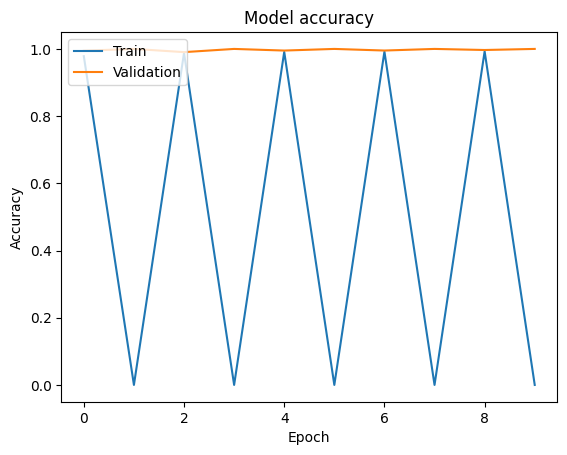

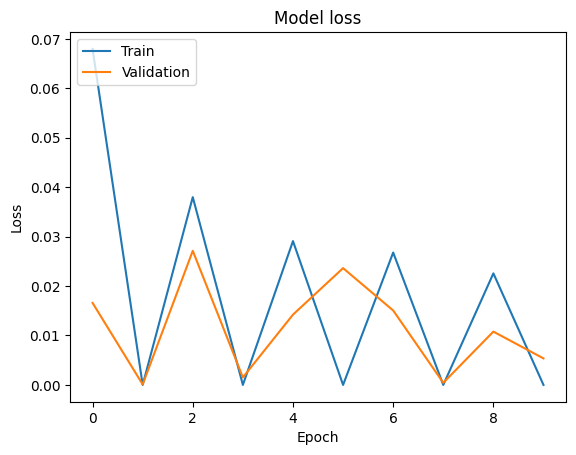

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## 7. Evaluation Model
Evaluate the Model on Test Data: Use the test set to see how well the model performs on unseen data.

Make Predictions: You can test the model's predictions on a few images to see how well it generalizes.

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


468/468 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.9955 - loss: 0.0213
Test Accuracy: 99.68%


## 8.Predicting the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


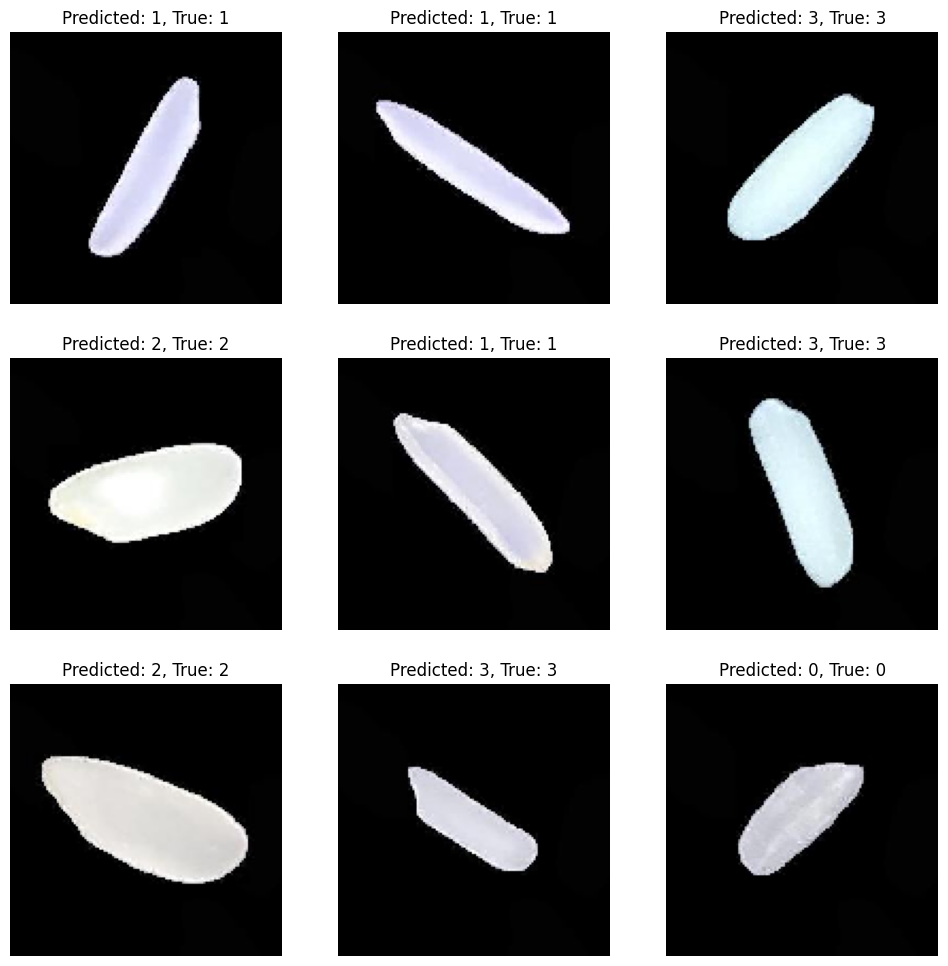

In [27]:
import numpy as np

# Get some images from the validation set to predict
x_test, y_test = next(validation_generator)
predictions = model.predict(x_test)

# Function to plot images with predictions
def plot_predictions(images, predictions, true_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Predicted: {np.argmax(predictions[i])}, True: {np.argmax(true_labels[i])}')
        plt.axis('off')
    plt.show()

# Visualizing predictions
plot_predictions(x_test, predictions, y_test)
